### **Artificial Intelligence and Machine Learning**

Introduction to Natural Language Processing - Support Ticket Categorization

In an era where customer insights drive innovation, organizations are increasingly recognizing the critical importance of feedback in shaping their products and services.

- For Product Managers and Product Analysts, staying attuned to the voice of customers is not just a best practice; it's a strategic imperative.

- To manage customer experience and expectations effectively, a structured approach is essential—one that discerns the most pressing issues, sets priorities, and allocates resources wisely.

One of the most powerful strategies available is harnessing the potential of automated support ticket categorization, leveraging advanced tools using Large Language Models and Generative AI.

# **Support Ticket Categorization**




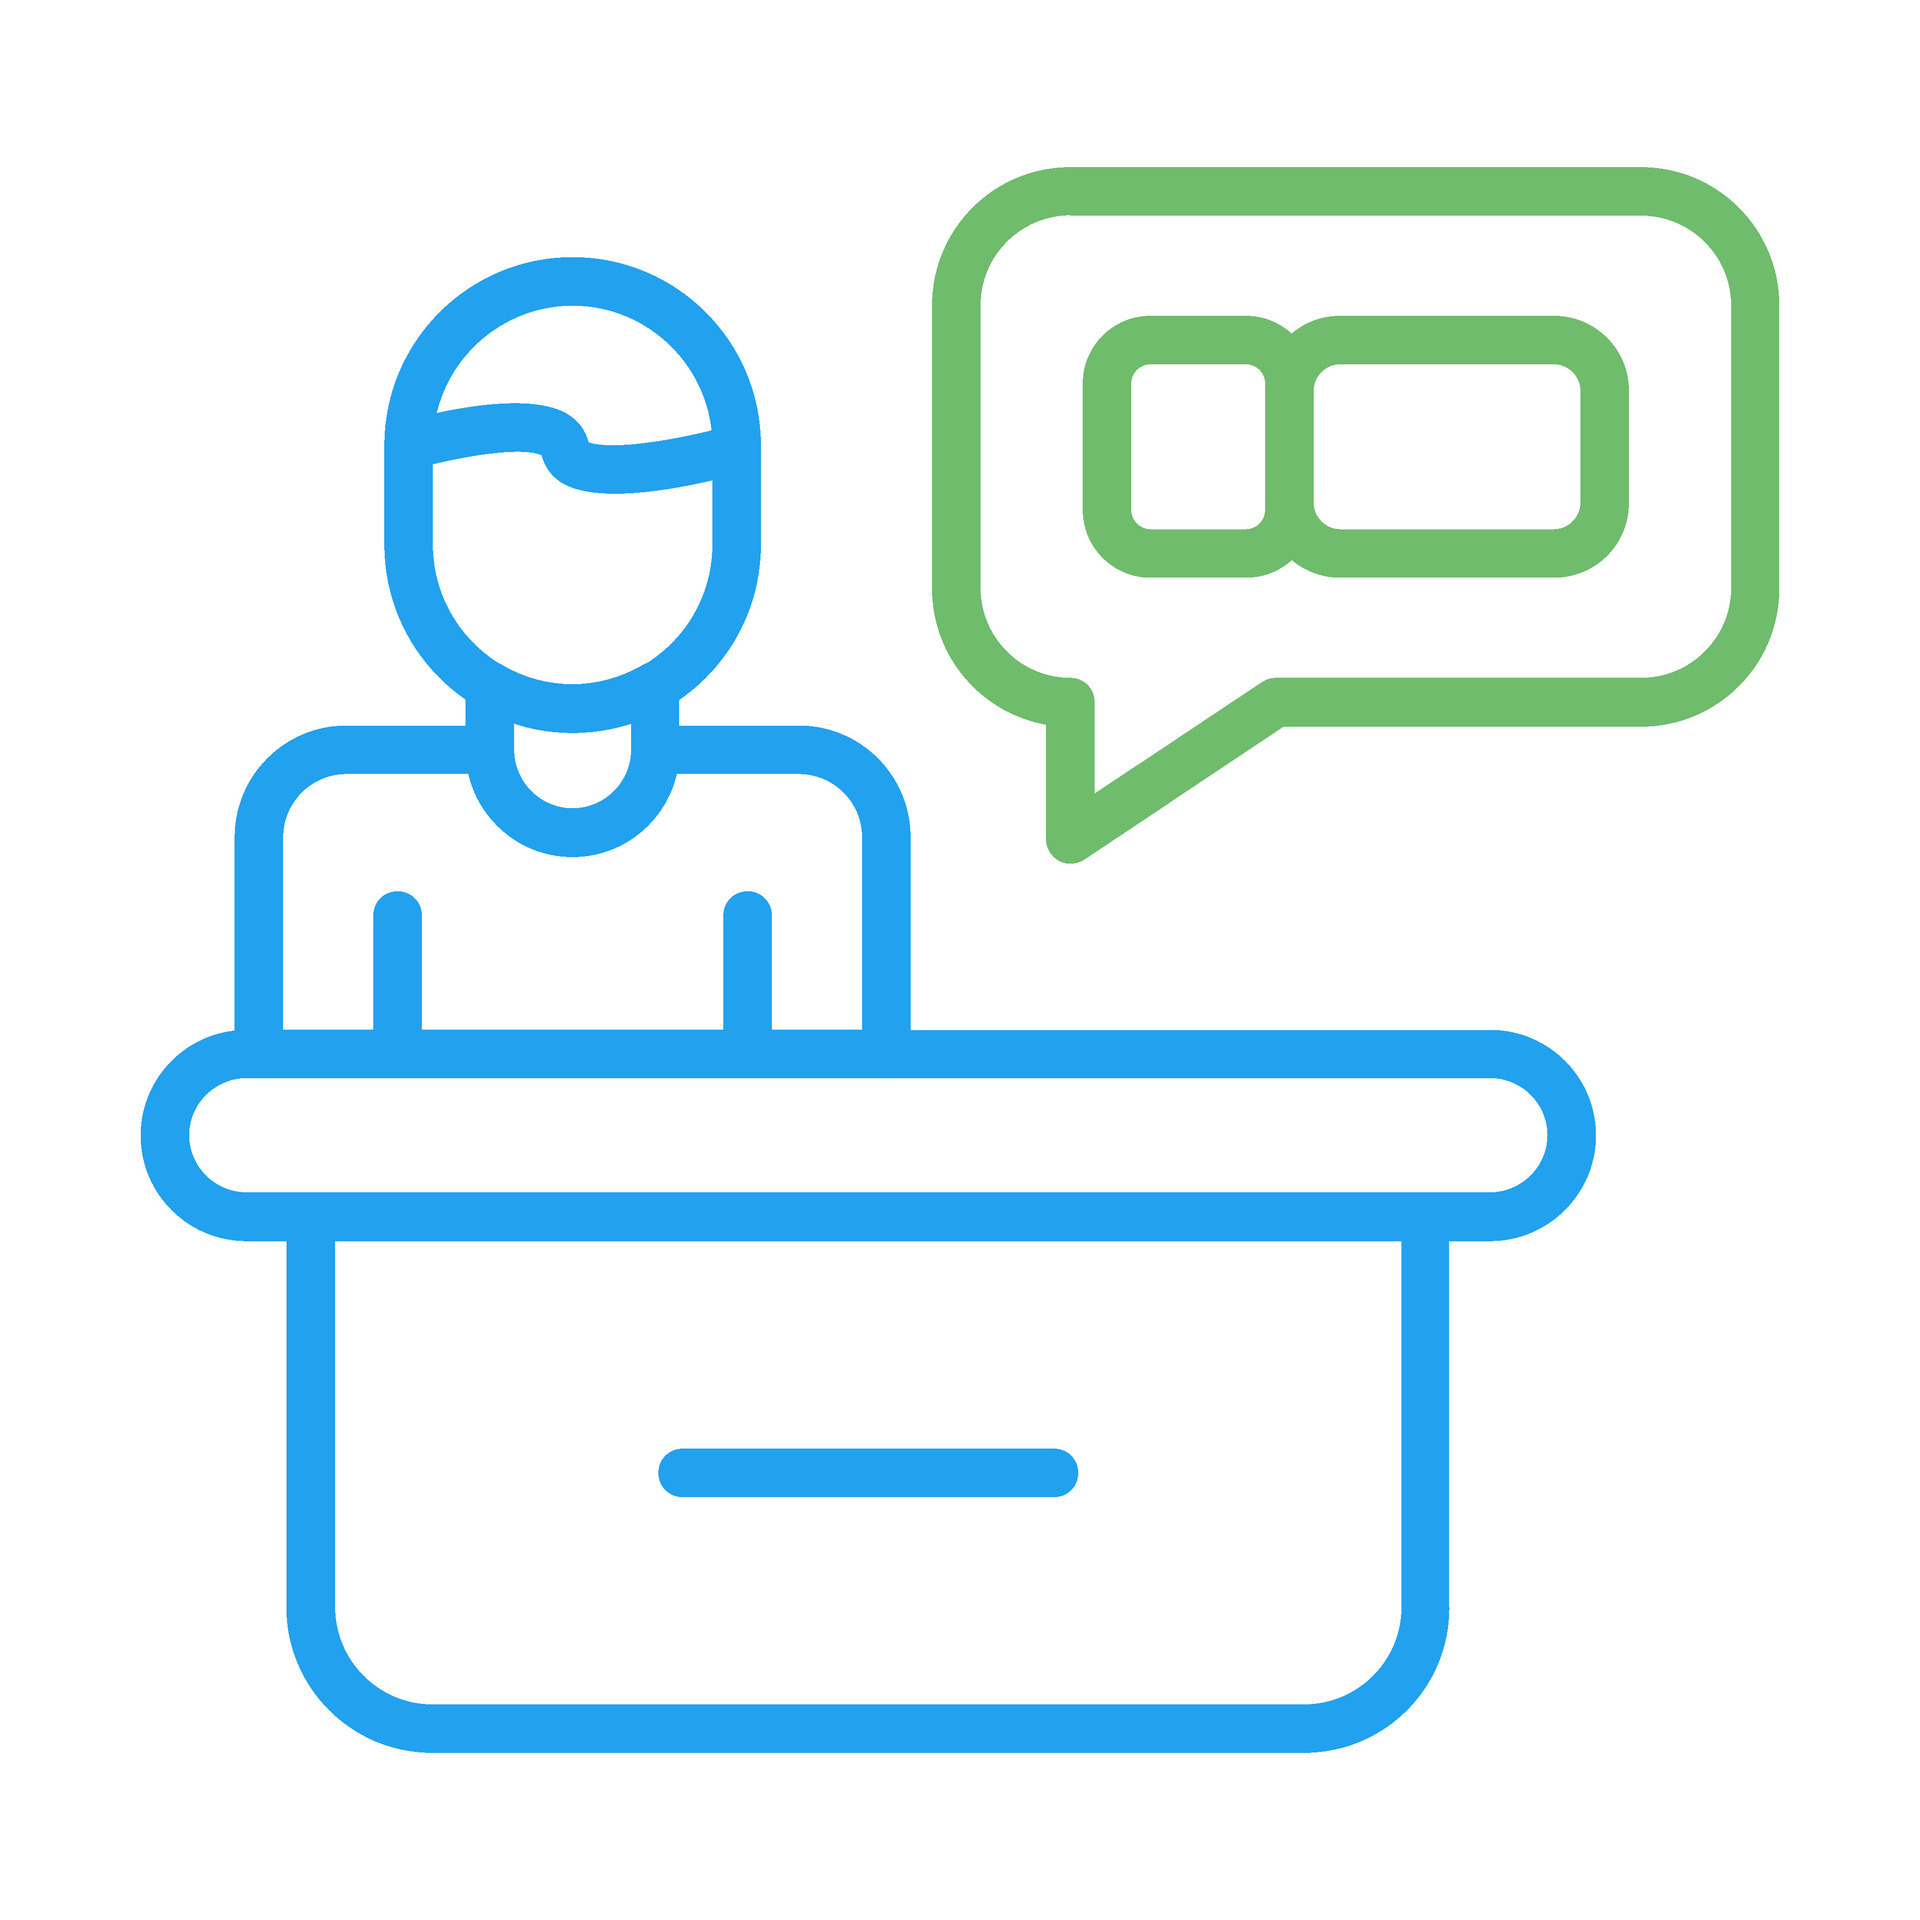

By Sweta Prasad

### **Objective**

Developed a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


### **Sample of Expected Output**

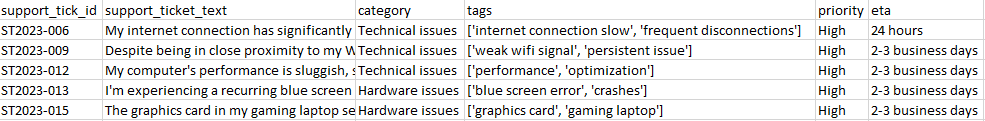

### **Installation of Necessary Libraries and Dependencies**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 316.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 313.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 213.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 296.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nv

In [ ]:
# Install the hugging face hub
!pip install huggingface_hub -q

### **Python code imports the 'hf_hub_download' function from the 'huggingface_hub' library and also imports the 'Llama' class from the 'llama_cpp' library.**

Code to import the 'hf_hub_download' function from the 'huggingface_hub' library

In [ ]:
from huggingface_hub import hf_hub_download





 Code to import the 'Llama' class from the 'llama_cpp' library

In [ ]:
from llama_cpp import Llama

In [ ]:
# defining the model name or path as a string (You can find this info from hugging face website)
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# defining the model basename as a string, indicating it's in the gguf format
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [ ]:
# downloading the model from the Hugging Face Hub using the 'hf_hub_download' function by specifying the 'repo_id' and 'filename'
model_path = hf_hub_download(
    repo_id = model_name_or_path,   # complete the code to mentioned the repo_id
    filename = model_basename   # complete the code to mentioned the filename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
#Code to create an instance of the 'Llama' class with specified parameters

lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

### **Define the System Message**

A Python function called **generate_llama_response** that takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function,  performed the following tasks:

 A system message as a string and assign it to the variable system_message.

- **Combine the support_ticket_text and system_message to create a prompt string.**

*Generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 256.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing 'INST'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.



- Content and instructions included in the system message to guide the technical assistant when processing support tickets.

- A detailed description of the information and guidelines that the system message should contain.*

Here's a detailed breakdown of what should be included:

- **Introduction (System Role):** Begin with an introductory statement that establishes the role of the system message. In this case, it's acting as a guide for a technical assistant.

- **Ticket Categorization:** Explain the primary task of the technical assistant, which is to classify the support ticket into specific categories. In this example, the categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

- **Response Options:** Clearly state that the assistant should only respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **Sub-Tasks:** Outline the secondary tasks that the technical assistant should perform once the category is identified. These sub-tasks include:
  - **Creating Tags:** Instruct the assistant to create tags that will help further classify the ticket.
  - **Assigning Priority:** Specify that the assistant should assign a priority level (e.g., "High" or "Normal") based on their understanding of the text.
  - **Suggesting ETA:** Guide the assistant to provide an estimated time for
resolving the issue mentioned in the ticket.

- **General Instructions:** Offer general instructions that should be followed throughout the ticket processing, such as:

  - **Categorization:** Reiterate that the assistant should categorize the ticket only into the predefined categories.
  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before assigning priority.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

**The output of the model should be in JSON format**

In [ ]:
def generate_llama_response(support_ticket_text):

    # System message
    system_message = """
        [INST]<<SYS>>
        --
        **Ticket Categorization:**
        Your primary task is to classify the support ticket into specific categories.
        The categories are:
        - **Technical Issues
        - **Hardware Issues
        - **Data Recovery

        **Response Options:**
        Kindly respond only with one of the predefined categoreies as listed above.

        **Sub-Tasks:**
        Once the category is identified, perform the following sub-tasks:
        - **Creating Tags:**Generate tags that will further classify the ticket.
        - **Assigning Priority:**Set a priority level(e.g., "High" or "Normal") based on understanding on your text.
        - **Suggesting ETA:**Provide an estgimated time for resolving the mentioned issue.

        **General Instructions:**
        - **Categorization:**categorize tickets only into the predefined categories.
        - **Reading Carefully:**Thoroughly read the support ticket text and consider the overall sentiment before assigning priority.

        - **Output Format:**
       Please format your responses in Json fromat.
       .format JSON --

        <</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{support_ticket_text}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=256,    # complete the code to set the max tokens to generate
        temperature= 0,    # complete the code to set the temperature (between 0 and 1)
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text

- Max_tokens: This parameter specifies the maximum number of tokens that the model should generate in response to the prompt. In this case, it's set to 1024.

- Temperature: This parameter controls the randomness of the generated response. A higher temperature value will result in a more random response, while a lower temperature value will result in a more predictable response. In this case, it's set to 0, which means the response will be as deterministic as possible.

- Top_p: This parameter controls the diversity of the generated response. A higher value of top_p will result in a more diverse response, while a lower value will result in a less diverse response. In this case, it's set to 0.95, which means the model will try to generate a diverse response.

- Repeat_penalty: This parameter controls the penalty for repeating tokens in the generated response. A higher value of repeat_penalty will result in a lower probability of repeating tokens, while a lower value will result in a higher probability of repeating tokens. In this case, it's set to 1.2, which means the model will try to avoid repeating tokens.

- Top_k: This parameter controls the maximum number of tokens that will be considered when generating the response. In this case, it's set to 50, which means the model will consider the top 50 tokens in terms of likelihood of occurrence when generating the response.

- Stop: This parameter is a list of tokens that should be stopped when generating the response. In this case, it's set to ['INST'], which means the model will stop generating tokens when it encounters the token "INST".

- Echo: This parameter controls whether the generated response should be echoed back to the user. In this case, it's set to False, which means the generated response will not be echoed back to the user.

- Seed: This parameter specifies a seed value that helps replicate results.

### **Loading the Dataset**

In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd


In [ ]:
# Read the CSV file into a DataFrame and store it in the 'data' variable
data=pd.read_csv('/content/Support_ticket_text.csv')

In [ ]:
data

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."
5,ST2023-011,I'm locked out of my online banking account an...
6,ST2023-012,"My computer's performance is sluggish, severel..."
7,ST2023-013,I'm experiencing a recurring blue screen error...
8,ST2023-014,My external hard drive isn't being recognized ...
9,ST2023-015,The graphics card in my gaming laptop seems to...


In [ ]:
data.info

<bound method DataFrame.info of    support_tick_id                                support_ticket_text
0       ST2023-006  My internet connection has significantly slowe...
1       ST2023-007  Urgent help required! My laptop refuses to sta...
2       ST2023-008  I've accidentally deleted essential work docum...
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...
4       ST2023-010  My smartphone battery is draining rapidly, eve...
5       ST2023-011  I'm locked out of my online banking account an...
6       ST2023-012  My computer's performance is sluggish, severel...
7       ST2023-013  I'm experiencing a recurring blue screen error...
8       ST2023-014  My external hard drive isn't being recognized ...
9       ST2023-015  The graphics card in my gaming laptop seems to...
10      ST2023-016  I accidentally formatted my USB drive with cri...
11      ST2023-017  My computer's screen has gone black, and I can...
12      ST2023-018  I accidentally spilled water on my laptop, and...
13      ST2023-019  My USB flash drive is physically damaged, and ...
14      ST2023-020  The touchpad on my laptop has stopped working,...
15      ST2023-021  My internet connection is frequently dropping,...
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...
17      ST2023-023  I accidentally formatted my USB drive with cru...
18      ST2023-024  My external hard drive isn't being recognized,...
19      ST2023-025  I am experiencing a critical problem with my i...
20      ST2023-026  I hope this message finds you well. I am writi...>

### **Data Overview**

In [ ]:
# Check the first 5 rows of the data
data.head()


,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [ ]:
data.tail()

,support_tick_id,support_ticket_text
16,ST2023-022,Wi-Fi is inconsistent despite proximity to the...
17,ST2023-023,I accidentally formatted my USB drive with cru...
18,ST2023-024,"My external hard drive isn't being recognized,..."
19,ST2023-025,I am experiencing a critical problem with my i...
20,ST2023-026,I hope this message finds you well. I am writi...


In [ ]:
# Check the shape of the data
data.shape

(21, 2)

In [ ]:
# check the duplicate of the data
data.duplicated().sum()

0

In [ ]:
data.describe()

,support_tick_id,support_ticket_text
count,21,21
unique,21,21
top,ST2023-006,My internet connection has significantly slowe...
freq,1,1


In [ ]:
# Check for missing values in the data
data.isnull().sum(axis=0)


support_tick_id        0
support_ticket_text    0
dtype: int64

### **Create a new column in the DataFrame called 'llama_response' and populate it with responses generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame**

## **New data ('category', 'priority', 'tag', and 'ETA') is generated by the function 'generate_llama_response'**

In [ ]:
data_1=data.copy()

 - Completed the code to create a new column llama_response

 - Applied the function to each element in the 'support_ticket_text' column of the DataFrame 'data'

In [ ]:
data_1['llama_response'] = data_1['support_ticket_text'].apply(lambda x: generate_llama_response(x))


llama_print_timings:        load time =   10915.62 ms
llama_print_timings:      sample time =      29.59 ms /    50 runs   (    0.59 ms per token,  1689.70 tokens per second)
llama_print_timings: prompt eval time =   10915.10 ms /   354 tokens (   30.83 ms per token,    32.43 tokens per second)
llama_print_timings:        eval time =    2110.42 ms /    49 runs   (   43.07 ms per token,    23.22 tokens per second)
llama_print_timings:       total time =   13084.33 ms /   403 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =   10915.62 ms
llama_print_timings:      sample time =      30.30 ms /    51 runs   (    0.59 ms per token,  1683.28 tokens per second)
llama_print_timings: prompt eval time =     414.00 ms /   352 tokens (    1.18 ms per token,   850.24 tokens per second)
llama_print_timings:        eval time =    2153.64 ms /    50 runs   (   43.07 ms per token,    23.22 tokens per second)
llama_print_timings:       total time =    2633.72 ms /   402 

In [ ]:
#The first five rows of the data to confirm whether the new column has been added
data_1.head()

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues"",\n..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues"",\n ..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""category"": ""Data Recovery"",\n ..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""category"": ""Technical Issues"",\n..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""category"": ""Technical Issues"",\n..."


In [ ]:
data_1.tail()

,support_tick_id,support_ticket_text,llama_response
16,ST2023-022,Wi-Fi is inconsistent despite proximity to the...,"{\n ""category"": ""Technical Issues"",\n..."
17,ST2023-023,I accidentally formatted my USB drive with cru...,"{\n ""category"": ""Data Recovery"",\n ..."
18,ST2023-024,"My external hard drive isn't being recognized,...","{\n ""category"": ""Data Recovery"",\n ..."
19,ST2023-025,I am experiencing a critical problem with my i...,"{\n ""category"": ""Technical Issues"",\n..."
20,ST2023-026,I hope this message finds you well. I am writi...,"{\n ""category"": ""Technical Issues"",\n..."


In [ ]:
data_1['llama_response'].head()

0     {\n         "category": "Technical Issues",\n...
1     {\n         "category": "Hardware Issues",\n ...
2     {\n         "category": "Data Recovery",\n   ...
3     {\n         "category": "Technical Issues",\n...
4     {\n         "category": "Technical Issues",\n...
Name: llama_response, dtype: object

In [ ]:
#Checking the full ticket text
i=20


In [ ]:
print(data_1.loc[i, 'support_ticket_text'])

I hope this message finds you well. I am writing to report a perplexing issue I've encountered with my work computer in recent days. 
The problem seems to involve a combination of unusual software behavior and unexpected data loss.
Over the past week, I've observed that certain software applications on my computer have been 
behaving erratically. For example, some applications freeze randomly, while others exhibit unexplained crashes. Additionally, 
I've noticed that some files and documents that were previously saved on my desktop have mysteriously 
disappeared. These issues are causing significant disruptions to my daily tasks and workflow.
While I don't have specific instructions on how to resolve this complex problem,
I suspect there may be an underlying issue with the system or software compatibility. 
I kindly request your expertise and assistance in thoroughly diagnosing this intricate problem. 
Your insights and guidance would be greatly appreciated. If you require any addition

In [ ]:
# Checking full ticket response
print(data_1.loc[i, 'llama_response'])

 {
         "category": "Technical Issues",
          "tags": ["software compatibility", "erratic behavior"],
           "priority": "High",
            "eta": "1-2 business days"
         }


### **Prepare the dataset in the desired format.**

In [ ]:
import json

In [ ]:
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [ ]:
#The modified function to the 'llama_response' column
data_1['llama_response_parsed'] = data_1['llama_response'].apply(extract_json_data)

In [ ]:
data_1

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['int..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues"",\n ...","{'category': 'Hardware Issues', 'tags': ['lapt..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""category"": ""Data Recovery"",\n ...","{'category': 'Data Recovery', 'tags': ['delete..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['Wi-..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['sma..."
5,ST2023-011,I'm locked out of my online banking account an...,"{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['pas..."
6,ST2023-012,"My computer's performance is sluggish, severel...","{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['per..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{\n ""category"": ""Hardware Issues"",\n ...","{'category': 'Hardware Issues', 'tags': ['blue..."
8,ST2023-014,My external hard drive isn't being recognized ...,"{\n ""category"": ""Data Recovery"",\n ...","{'category': 'Data Recovery', 'tags': ['Extern..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{\n ""category"": ""Hardware Issues"",\n ...","{'category': 'Hardware Issues', 'tags': ['grap..."


In [ ]:
# creating a new dataframe from the parsed llama response
llama_response_parsed_df = pd.json_normalize(data_1['llama_response_parsed'])

In [ ]:
llama_response_parsed_df

,category,tags,priority,eta
0,Technical Issues,"[internet connection, slow speed]",High,24 hours
1,Hardware Issues,"[laptop repair, presentation]",High,1-2 business days
2,Data Recovery,"[deleted documents, data loss]",High,24 hours
3,Technical Issues,"[Wi-Fi, signal strength]",High,24 hours
4,Technical Issues,[smartphone battery drain],High,2-3 business days
5,Technical Issues,"[password reset, online banking]",High,1-2 hours
6,Technical Issues,"[performance, optimization]",High,2-3 business days
7,Hardware Issues,"[blue screen error, crashes]",High,2-3 business days
8,Data Recovery,"[External Hard Drive, Vital Data]",High,24 hours
9,Hardware Issues,"[graphics card, gaming laptop]",High,2-3 business days


In [ ]:
llama_response_parsed_df.head()

,category,tags,priority,eta
0,Technical Issues,"[internet connection, slow speed]",High,24 hours
1,Hardware Issues,"[laptop repair, presentation]",High,1-2 business days
2,Data Recovery,"[deleted documents, data loss]",High,24 hours
3,Technical Issues,"[Wi-Fi, signal strength]",High,24 hours
4,Technical Issues,[smartphone battery drain],High,2-3 business days


In [ ]:
#The code to concatenate the original data with the dataframe containing the parsed model output
data_1_with_parsed_model_output_1 = pd.concat([data_1, llama_response_parsed_df], axis=1)
data_1_with_parsed_model_output_1.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category,tags,priority,eta
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['int...",Technical Issues,"[internet connection, slow speed]",High,24 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues"",\n ...","{'category': 'Hardware Issues', 'tags': ['lapt...",Hardware Issues,"[laptop repair, presentation]",High,1-2 business days
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""category"": ""Data Recovery"",\n ...","{'category': 'Data Recovery', 'tags': ['delete...",Data Recovery,"[deleted documents, data loss]",High,24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['Wi-...",Technical Issues,"[Wi-Fi, signal strength]",High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""category"": ""Technical Issues"",\n...","{'category': 'Technical Issues', 'tags': ['sma...",Technical Issues,[smartphone battery drain],High,2-3 business days


In [ ]:
#The code to drop the columns containing the raw model response
final_data = data_1_with_parsed_model_output_1.drop(['llama_response_parsed'], axis=1)
final_data.head()

,support_tick_id,support_ticket_text,llama_response,category,tags,priority,eta
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues"",\n...",Technical Issues,"[internet connection, slow speed]",High,24 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues"",\n ...",Hardware Issues,"[laptop repair, presentation]",High,1-2 business days
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""category"": ""Data Recovery"",\n ...",Data Recovery,"[deleted documents, data loss]",High,24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""category"": ""Technical Issues"",\n...",Technical Issues,"[Wi-Fi, signal strength]",High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""category"": ""Technical Issues"",\n...",Technical Issues,[smartphone battery drain],High,2-3 business days


In [ ]:
#The code to drop the columns containing the raw model response
final_data = data_1_with_parsed_model_output_1.drop(['llama_response_parsed'], axis=1)
final_data.head()


,support_tick_id,support_ticket_text,llama_response,category,tags,priority,eta
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""category"": ""Technical Issues"",\n...",Technical Issues,"[internet connection, slow speed]",High,24 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issues"",\n ...",Hardware Issues,"[laptop repair, presentation]",High,1-2 business days
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""category"": ""Data Recovery"",\n ...",Data Recovery,"[deleted documents, data loss]",High,24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""category"": ""Technical Issues"",\n...",Technical Issues,"[Wi-Fi, signal strength]",High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""category"": ""Technical Issues"",\n...",Technical Issues,[smartphone battery drain],High,2-3 business days


In [ ]:
#The code to drop the columns containing the raw model response
final_data = data_1_with_parsed_model_output_1.drop(['llama_response','llama_response_parsed'], axis=1)
final_data.head()

,support_tick_id,support_ticket_text,category,tags,priority,eta
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[internet connection, slow speed]",High,24 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[laptop repair, presentation]",High,1-2 business days
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[deleted documents, data loss]",High,24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,"[Wi-Fi, signal strength]",High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Technical Issues,[smartphone battery drain],High,2-3 business days


### **Observations and insights recommendations for a business looking to adopt a solution.**

**Conclusion**

**Observations and Insight**

- The process of parsing and processing support ticket data enables enterprises to proficiently categorize, prioritize, and resolve customer concerns in technology, thereby enhancing the efficiency of their customer support operations.

- The Large Language Model TheBloke/Llama-2-13B-chat-GGUF was used to create Generative AI application. The application identifies 3 categories for the support ticket:

- Hardware Issues
- Data Recovery
- Technical Issues

- The model was instructed to provide only one of the three predefied categories.

- Sub-tasks were assigned to the AI after the categories were defined:
 - Tag Creation based on issue text sentiment
 - Priority prediction based on issue text sentiment
 - ETA prediction based on issue text sentiment

- Finally, in addition to all the above, we also got a response we can share with the customer for initial debug without human interaction.

- The overall sentiment of the support ticket and got the output in a structured format from the Large Language Model for ease-of-access.

**Business Recommendations**

- To improve the model performance, one can try the following:

   1. Update the prompt
   2. Update the model parameters (prompt, temparature, top_p, ...)
    - The LLM is very sensitive to the prompt given, it not only affects the runtime and performance of the generation, but also the accuracy.

- This is a very valuable tool for the business to classify support tickets. It can be use as a level 1 support and filter the issues to specific experts for support. It will increase efficiency, as well as free up personnel for more interactive assignments.

- Incorporating this methodology can be further grown in to more automation and will provide a base to build a more robust automated support solution.





---

